# autoMI with Pink Noise
This notebook brings you through a PSD, autocorrelation, and AutoMI with synthetic pink noise. Finally, we give an example of power-law model fitting on the data. 

##### Ensure packages are installed

In [ ]:
import pip

def import_or_install(package):
    try:
        __import__(package)
    except ImportError:
        pip.main(['install', package])  

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

In [ ]:
range_ = np.arange(1,1000)

In [ ]:
# compute autocorrelation over the range of lags
autocorr = autocorrelate(y, range_)

  0%|          | 0/999 [00:00<?, ?it/s]

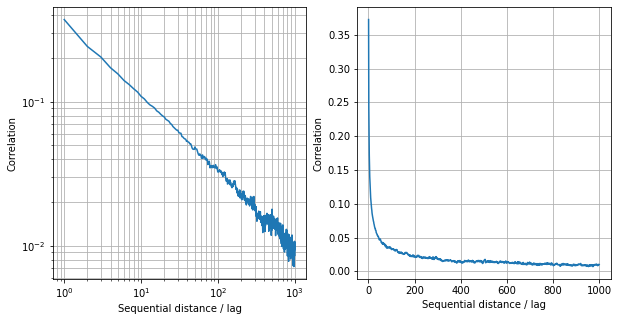

In [ ]:
# plot the autocorrelation in log-log and linear
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
ax = axs[0]
ax.plot(range_, autocorr)
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('Correlation')
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(which='both')

ax = axs[1]
ax.plot(range_, autocorr)
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('Correlation')
ax.grid(which='both')

### Auto mutual information
- We first need discrete states as input to the sequential mutual information function. To that end, we can bin our signal across 10 discrete states.
- We can then compute the Auto Mutual Information (AutoMI). The output of the AutoMI function will give us both the MI of the true signal and the MI of the shuffled signal. 
- Currently the Grassberger method of entropy estimation supports an estimate of the variance of the entropy and the naiive entropy estimation does not. 

In [ ]:
# digitize signal into discrete states
nbins = 10 # how many bins to compute over
bins =  np.linspace(np.min(y), np.max(y), nbins)
y_dig = np.digitize(y, bins, right=True)

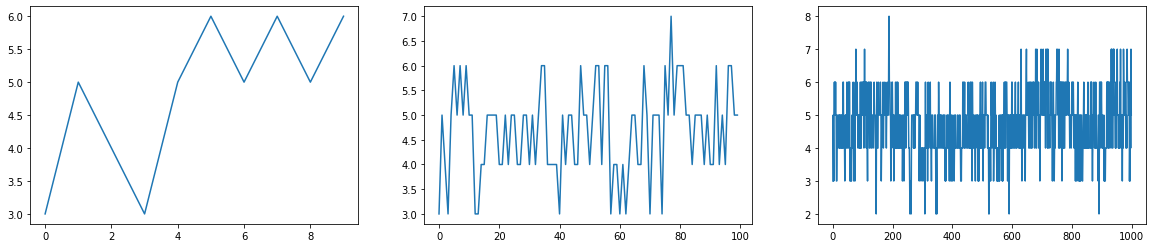

In [ ]:
fig, axs = plt.subplots(ncols = 3, figsize=(20,4))
axs[0].plot(y_dig[:10])
axs[1].plot(y_dig[:100])
axs[2].plot(y_dig[:1000])

In [ ]:
from automutualinformation import sequential_mutual_information as smi

NumExpr defaulting to 2 threads.

In [ ]:
(MI, _), (shuff_MI, _) = smi(
    [y_dig], distances=range_
)

  0%|          | 0/999 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 999 out of 999 | elapsed:  2.7min finished


  0%|          | 0/999 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 999 out of 999 | elapsed:  3.4min finished


### Plotting the AutoMI
- If we plot the raw AutoMI it decays towards chance. 

Text(0, 0.5, 'MI')

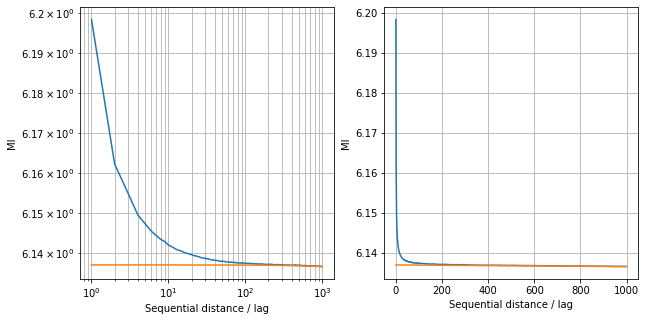

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
ax = axs[0]
ax.plot(range_, MI)
ax.plot(range_, shuff_MI)
ax.grid(which='both')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('MI')

ax = axs[1]
ax.plot(range_, MI)
ax.plot(range_, shuff_MI)
ax.grid(which='both')
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('MI')

### Plotting the AutoMI relative to chance
- If we plot the AutoMI relative to chance, we oberserve a power-law. 

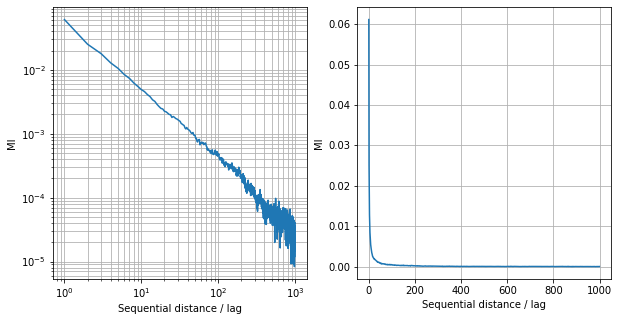

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
ax = axs[0]
ax.plot(range_, MI - shuff_MI)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('MI')
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('MI')
ax.grid(which='both')

ax = axs[1]
ax.plot(range_, MI - shuff_MI)
ax.set_xlabel('MI')
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('MI')
ax.grid(which='both')


### Fitting a decay model

In [ ]:
from automutualinformation import fit_model

In [ ]:
decay_model, model_y = fit_model(
    distances = range_,
    sig = MI - shuff_MI,
)
decay_model

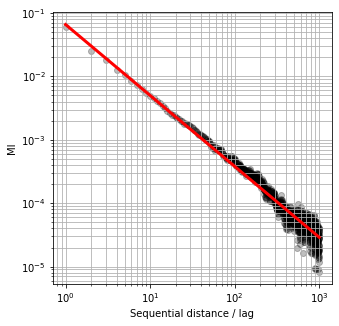

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(5,5))
ax.scatter(range_, MI - shuff_MI, color = 'k', alpha = 0.25)

ax.plot(range_, model_y, lw=3, color = 'red')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('MI')
ax.grid(which='both')

(2001,)

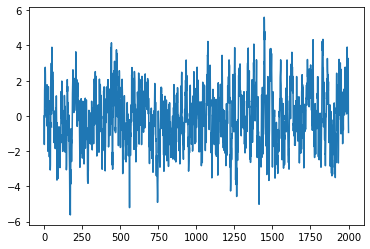

In [ ]:
import numpy as np

def MkSg_AR(rho):
  steps = 2000

  e = np.random.randn(steps)
  y = [0]

  # Possible to get rid of this loop?
  for i in range(len(e)):
      y.append(rho*y[i] + e[i])
  return np.array(y)

zzzz = MkSg_AR(0.8)
plt.plot(zzzz)
zzzz.shape



In [ ]:
a = np.linspace(0,1,200)
ARmatrix = np.array([])
for i in tqdm(range(a.size)):
  zzz = MkSg_AR(a[i])
  if ARmatrix.size == 0:
    ARmatrix = zzz
  else:
    ARmatrix = np.vstack((ARmatrix, zzz))

print(ARmatrix.shape)
ARmatrix


  0%|          | 0/200 [00:00<?, ?it/s]

(200, 2001)


array([[  0.        ,  -0.88704046,  -0.74243036, ...,   0.26114359,
          1.71842567,  -1.45837143],
       [  0.        ,  -0.11669887,  -0.05834246, ...,  -0.45159669,
         -0.53950435,   0.05347859],
       [  0.        ,  -0.07548245,   2.59813801, ...,   0.45869406,
         -0.29539545,  -0.34613102],
       ...,
       [  0.        ,   0.6857333 ,  -0.54557398, ...,   8.82850351,
          9.8626714 ,   8.56968443],
       [  0.        ,   0.9089292 ,   0.87848584, ...,  -5.12910032,
         -5.68301172,  -5.51254775],
       [  0.        ,   0.58241029,   1.64353069, ..., -53.0359057 ,
        -52.61957949, -52.32402786]])

In [ ]:
def AC1(series):
    return np.corrcoef(series[0:-1], series[1:])[0][1]

  0%|          | 0/200 [00:00<?, ?it/s]

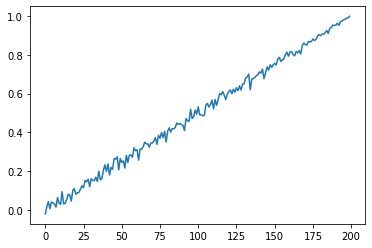

In [ ]:
AC1matrix = []
for seriesidx in tqdm(range(ARmatrix.shape[0])):
  AC1matrix.append(AC1(ARmatrix[seriesidx]))
plt.plot(AC1matrix)


In [ ]:
import numpy as np
from scipy.special import digamma
from pyitlib import discrete_random_variable as drv
import faiss
from bisect import bisect
import sys
np.set_printoptions(threshold=sys.maxsize)


def compute_kmu(x, y, per_filter=True, avarage=True, n_neighbors=3):
    """Compute mutual information between continious and discrete variables
    :parameter
    x : ndarray, shape (batch_size, n_filters, height, width)
         4d  continious variable,
    y : ndarray,  shape (batch_size, )
        1d discrete variable
        per_filter : bool,
        Whether to calculate mu between each 3d filter and discrete variable, or full 4d tensor and discrete variable
    avarage : bool,
        In case of per_filter=True, avarage the result or no
    n_neighbors: int,
        Number of nearest neighbors to search for each point
     :returns
     kmu : float, or list of floats (depends on per_filter parameter),
        Estimated mutual information
     """
    if per_filter:
        filters_count = x.shape[1]
        x = x.reshape(x.shape[0],x.shape[1], -1)
        kmu = [mu_approximate(x[:, i, :], y, n_neighbors=n_neighbors) for i in range(filters_count)]
    else:
        x = x.reshape(x.shape[0], -1)
        kmu = mu_approximate(x, y, n_neighbors=n_neighbors)

    if avarage:
        kmu = np.mean(kmu)

    return kmu


def nn_faiss(x, k):
    """Compute nearest neighbors for the each point in the given set
    :parameter
    x : ndarray, shape (n_samples, )
        Set of points
    k : int,
        Number of nearest neighbors to search for each point
    :returns
    d : ndarray, shape (n_samples, n_neighbors)
        Distances between the point and each neighbor for each point,
    """
    index = faiss.IndexFlatL2(x.shape[1])
    index.add(x)
    d, i = index.search(x, k + 1)
    return d


def mu_approximate(c, d, n_neighbors):
    """Mutual information calculation based on approximate nearest neighbors
      :parameter
      c : ndarray, shape (n_samples,)
          Samples of a continuous random variable.
      d : ndarray, shape (n_samples,)
          Samples of a discrete random variable.
      n_neighbors : int
          Number of nearest neighbors to search for each point, see [1]_.
      :returns
      mi : float
          Estimated mutual information. If it turned out to be negative it is
          replace by 0.
      Notes
      -----
      True mutual information can't be negative. If its estimate by a numerical
      method is negative, it means (providing the method is adequate) that the
      mutual information is close to 0 and replacing it by 0 is a reasonable
      strategy.
      ----------
    """
    n_samples = c.shape[0]
    radius = np.empty(n_samples)
    label_counts = np.empty(n_samples)
    k_all = np.empty(n_samples)

    for label in np.unique(d):
        mask = d == label
        count = np.sum(mask)
        if count > n_neighbors + 1:

            k = min(n_neighbors, count - 1)
            try:
                dist = nn_faiss(c[mask, :], k=k)
            except FloatingPointError as ex:
                print(ex)
            radius[mask] = np.nextafter(dist[:, -1], 0)

            k_all[mask] = k
        label_counts[mask] = count

    # Ignore points with unique labels.
    mask = label_counts > 1
    n_samples = np.sum(mask)
    label_counts = label_counts[mask]
    k_all = k_all[mask]
    c = c[mask]
    radius_faiss = radius[mask]

    index = faiss.IndexFlatL2(c.shape[1])
    index.add(c)
    # find at max 100 neighbors. Can lead to inaccuracies, but will speed up the process
    D = nn_faiss(c, k=100)
    idc_counts = np.array([max(0, (bisect(D[i], radius_faiss[i]))) for i in range(c.shape[0])])

    mi = (digamma(n_samples) + np.mean(digamma(k_all)) -
          np.mean(digamma(label_counts)) -
          np.mean(digamma(idc_counts + 1)))

    # mutual information can not be too high. It means that approximation gave bad results
    if mi > 100: mi = -1
    return max(0, mi)


Loading faiss with AVX2 support.

Successfully loaded faiss with AVX2 support.

  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


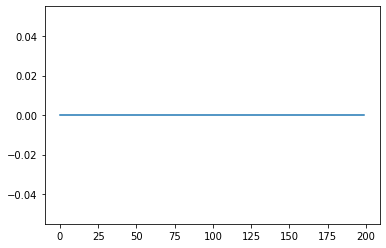

In [ ]:
AMI1matrix = []
for seriesidx in tqdm(range(ARmatrix.shape[0])):
  series = ARmatrix[seriesidx]
  MI = compute_kmu(series[0:-1], series[1:], per_filter=False)
  AMI1matrix.append(MI)
plt.plot(AMI1matrix)

In [ ]:
pip.main(['uninstall', 'scipy'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


WARNING: No metadata found in /usr/local/lib/python3.8/dist-packages


Found existing installation: scipy 1.7.3

WARNING: No metadata found in /usr/local/lib/python3.8/dist-packages


WARNING: No metadata found in /usr/local/lib/python3.8/dist-packages


WARNING: No metadata found in /usr/local/lib/python3.8/dist-packages


WARNING: No metadata found in /usr/local/lib/python3.8/dist-packages


WARNING: No metadata found in /usr/local/lib/python3.8/dist-packages


WARNING: No metadata found in /usr/local/lib/python3.8/dist-packages


WARNING: No metadata found in /usr/local/lib/python3.8/dist-packages


WARNING: No metadata found in /usr/local/lib/python3.8/dist-packages


Can't uninstall 'scipy'. No files were found to uninstall.

0

In [ ]:
from teaspoon.parameter_selection import MI_delay
AMI1matrix = []
for seriesidx in tqdm(range(ARmatrix.shape[0])):
  series = ARmatrix[seriesidx]
  MI = MI_delay.MI_kraskov(series[0:-1], series[1:])
  AMI1matrix.append(MI)
plt.plot(AMI1matrix)

  0%|          | 0/200 [00:00<?, ?it/s]

NameError: ignored